## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # To ingnore any warnings

In [2]:
stu_df=pd.read_csv("students-data.csv",sep=";")
stu_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
313,GP,F,19,U,LE3,T,3,2,services,other,...,4,2,2,1,2,1,22,13,10,11
217,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,13,6,6,8
45,GP,F,15,U,LE3,A,4,3,other,other,...,5,2,2,1,1,5,8,8,8,6
365,MS,M,18,R,GT3,T,1,3,at_home,other,...,3,3,4,2,4,3,4,10,10,10
112,GP,F,16,U,GT3,T,2,2,at_home,other,...,3,1,2,1,1,5,6,10,13,13
209,GP,F,17,R,GT3,T,4,3,teacher,other,...,4,4,2,1,1,4,6,7,7,7
79,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,4,3,1,2,3,12,5,5,5
249,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,5,3,2,1,1,5,0,13,13,14
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0


In [3]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Inferences:- 
### 1.We have 33 attributes and have passable amount of data(i.e. about 395 entries) for modelling.
### 2. From the research it shows that this dataset has 30 independent variables and 3 dependent variables of which is 1 coloumn(i.e G3) is the target attribute.
### 3.Lots of attribute columns are having data type as object(i.e about 17 attributes in total).

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
stu_df.index.name='Number'
stu_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(stu_df)

Your selected dataframe has 33 columns and 395 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### Inferences:- No dropping as there are no missing values. 

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
stu_df.select_dtypes(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
Number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [7]:
stu_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [8]:
drop_col=stu_df.var()<1
drop_list=drop_col.index[drop_col.values==True]

In [9]:
drop_list

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

### Inferences:- 6 numerical independent variables have variences less than 1.

In [10]:
stu_df.drop(drop_list,axis=1,inplace=True)

In [11]:
stu_df.var()<1

age         False
Medu        False
Fedu        False
goout       False
Walc        False
health      False
absences    False
G1          False
G2          False
G3          False
dtype: bool

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [12]:
x = stu_df.select_dtypes(include='object').columns
for i in x:
    print("Unique values in ",i,": \t",stu_df[i].unique())

Unique values in  school : 	 ['GP' 'MS']
Unique values in  sex : 	 ['F' 'M']
Unique values in  address : 	 ['U' 'R']
Unique values in  famsize : 	 ['GT3' 'LE3']
Unique values in  Pstatus : 	 ['A' 'T']
Unique values in  Mjob : 	 ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in  Fjob : 	 ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in  reason : 	 ['course' 'other' 'home' 'reputation']
Unique values in  guardian : 	 ['mother' 'father' 'other']
Unique values in  schoolsup : 	 ['yes' 'no']
Unique values in  famsup : 	 ['no' 'yes']
Unique values in  paid : 	 ['no' 'yes']
Unique values in  activities : 	 ['no' 'yes']
Unique values in  nursery : 	 ['yes' 'no']
Unique values in  higher : 	 ['yes' 'no']
Unique values in  internet : 	 ['no' 'yes']
Unique values in  romantic : 	 ['no' 'yes']


### Inferences:-Most categorical attributes have only 2 unique values and some have [3,4,5] unique values.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x:
    stu_df[i] = le.fit_transform(stu_df[i])

In [14]:
stu_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [15]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  schoolsup   395 non-null    int32
 13  famsup      395 non-null    int32
 14  paid        395 non-null    int32
 15  activities  395 non-null    int32
 16  nursery     395 non-null    int32
 17  higher      395 non-null    int32
 18  internet    395 non-null    int32
 19  romantic    395 non-null    int32
 20  goout       395 non-null    int6

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
stu_df[['G1','G2','G3']] = np.where(stu_df[['G1','G2','G3']]<10,0,1)

In [17]:
stu_df[['G1','G2','G3']].head()

,G1,G2,G3
Number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
X = stu_df.drop('G3',axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [19]:
y=stu_df['G3']
y.head()

Number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

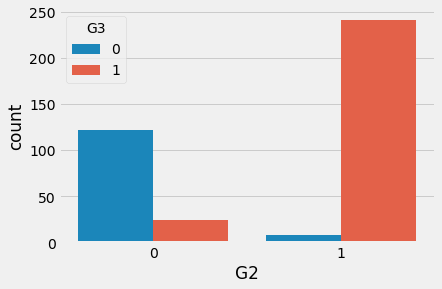

In [20]:
plt.style.use('fivethirtyeight')
sns.countplot(stu_df['G2'],hue=stu_df['G3'])

In [21]:
stu_df['G3'].value_counts()

1    265
0    130
Name: G3, dtype: int64

In [22]:
stu_df['G2'].value_counts()

1    249
0    146
Name: G2, dtype: int64

In [23]:
stu_df.corr()>.5

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
address,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
famsize,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pstatus,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Medu,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Fedu,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Mjob,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Fjob,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
stu_df['G3'].corr(stu_df['G2'])

0.8253931159764696


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


### Inferences:- G3 has high positive correalation with G2 hence is a good predictor.

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [25]:
stu_df['school'].value_counts()

0    349
1     46
Name: school, dtype: int64

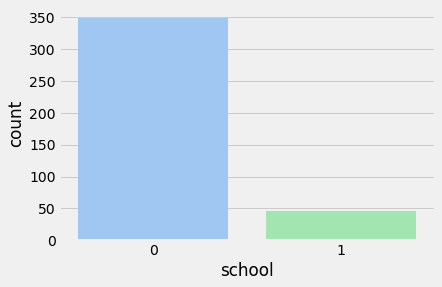

In [26]:
plt.style.use('seaborn-pastel')
sns.countplot(stu_df['school'])

### Inferences:- Here '0' represents school "GP" & '1' represents school 'MS"; GP school has 349 students and MS school has 46 students.

In [27]:
stu_df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

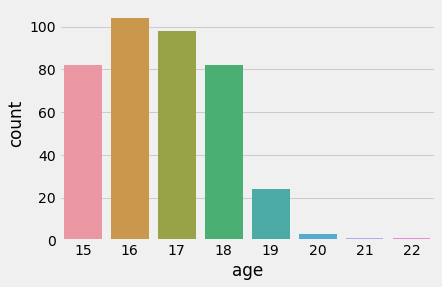

In [28]:
plt.style.use('seaborn-deep')
sns.countplot(stu_df['age'])

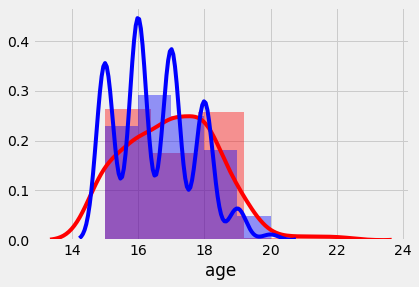

In [29]:
sns.distplot(stu_df[stu_df['G3'] == 0]['age'], color = 'r',bins=5)
sns.distplot(stu_df[stu_df['G3'] == 1]['age'], color = 'b',bins=5)

### Inferences:- 
### 1.Maximum students are of age 16 while only fewer in the age group of 20-22.
### 2.Maximum passed students are of age 16 while maximum failed students are between age of 16-18.

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#In order to get 300 records we will split data into test size of 95 records as total records is 395.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=95, random_state=1,stratify=y)

In [32]:
print('Number of records in Train :',X_train.shape[0])

Number of records in Train : 300


In [33]:
print('Number of records in Test :',X_test.shape[0])

Number of records in Test : 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LogReg_model=LogisticRegression()
LogReg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print('Logistic Regression accuracy score for training set: %f' % LogReg_model.score(X_train, y_train))
print('Logistic Regression accuracy score for testing set: %f' % LogReg_model.score(X_test, y_test))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, LogReg_model.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression accuracy score for training set: 0.933333
Logistic Regression accuracy score for testing set: 0.905263
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.94      0.92      0.93        64

    accuracy                           0.91        95
   macro avg       0.89      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



### Inferences:-
### 1.Accuracy Score in Test data is 90.53 %.
### 2.Accuracy Score in Training data is 93.33 %.
### 3.Precision is 94 %.
### 4.Recall is 92 %.
### 5.F1 score is 93 %.

### As model accuracy score in test & train environment is more than 90% ,close to each other and recall & precision is greater than 90%, therefore the model built is a good model.

# Naive bayes with Iris data

### Import Iris.csv

In [37]:
Iris_df=pd.read_csv("Iris.csv")
Iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
111,112,6.4,2.7,5.3,1.9,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor


In [38]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(Iris_df)

Your selected dataframe has 6 columns and 150 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [39]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
Iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Inferences:-
### 1.We have 6 attributes and have passable amount of data(i.e. about 150 entries) for modelling.
### 2. We have 4 independent attribute and 1 dependent or target attribute (i.e. ‘Species’).
### 3.Target attribute is having data type as object and has 3 unique values.
### 4. No missing values in the dataset.

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [41]:
Iris_df.drop(labels = 'Id',axis=1,inplace = True)
Iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dropped 'Id' column as it has no role to play in model building.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Iris_df['Species']=le.fit_transform(Iris_df['Species'])
Iris_df['Species'].unique()

array([0, 1, 2])

### Converting Target column from 'object' type  to 'integer' type before using it in model building for which LableEncoder has been used.

In [43]:
#Slicing data
Xi=Iris_df.drop('Species',axis=1)
Xi.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
yi=Iris_df['Species']
yi.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Data has been sliced into independent variables and dependent variables.

### Find the distribution of target variable (Class)

In [45]:
Iris_df['Species'].groupby(by = Iris_df['Species']).count()

Species
0    50
1    50
2    50
Name: Species, dtype: int64

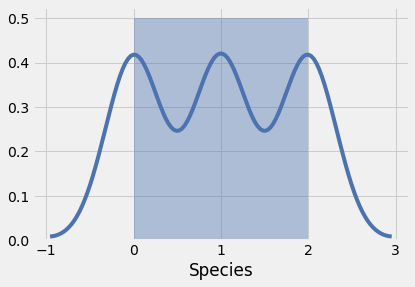

In [46]:
plt.style.use('seaborn-deep')
sns.distplot(yi)

### Inference:- Target variable has equal distribution.

### Plot the distribution of target variable using histogram

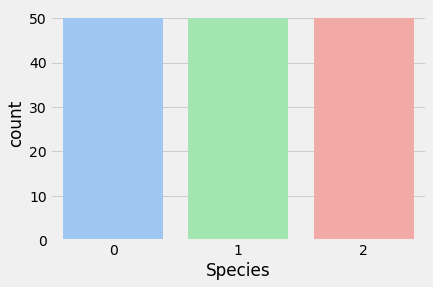

In [47]:
plt.style.use('seaborn-pastel')
sns.countplot(Iris_df['Species'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

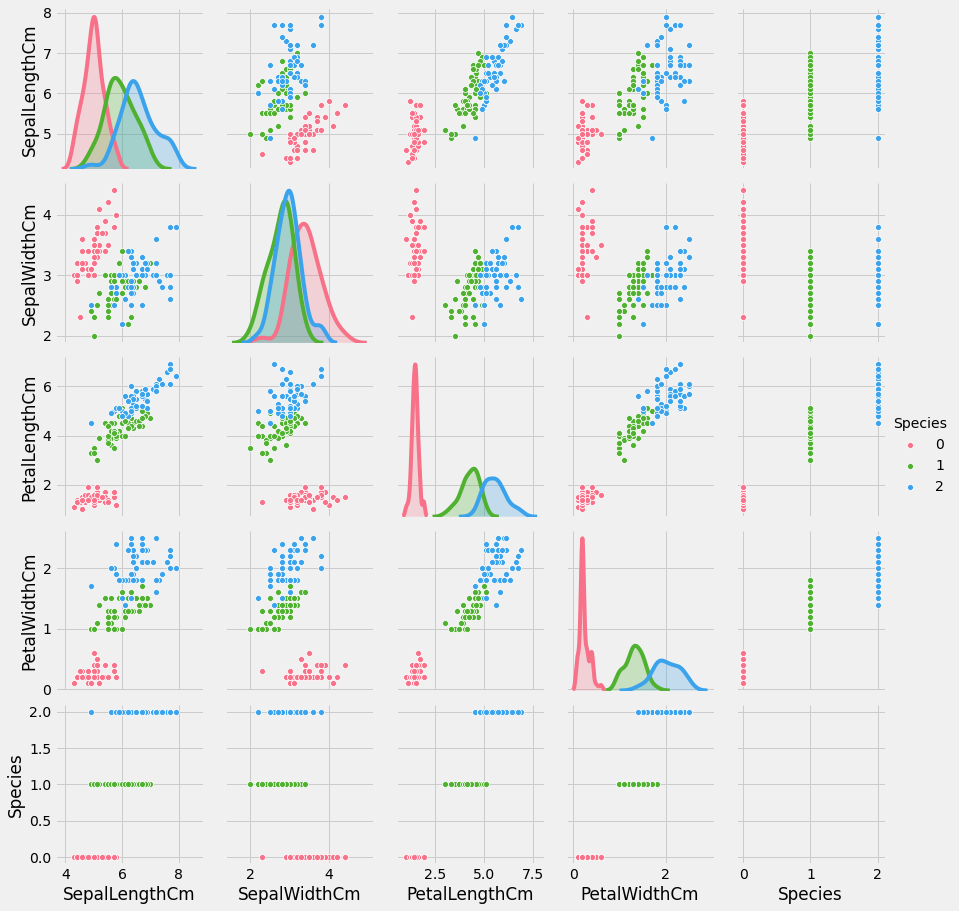

In [48]:
sns.pairplot(Iris_df,hue='Species',palette="husl",vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])

### Inferences:-
### 1.Both PetalLength & PetalWidth are very good predictor of Target variable, as they can clearly separate out all three species from each other
### 2.SepalLength seems to be a good predictor of Target variable.
### 3.SepalWidth seems to be a weak predictor of Target variable as it can only separate out one species from other 2 species.

### Summary Statistics and explain insights for at least 2 variables

In [49]:
Iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


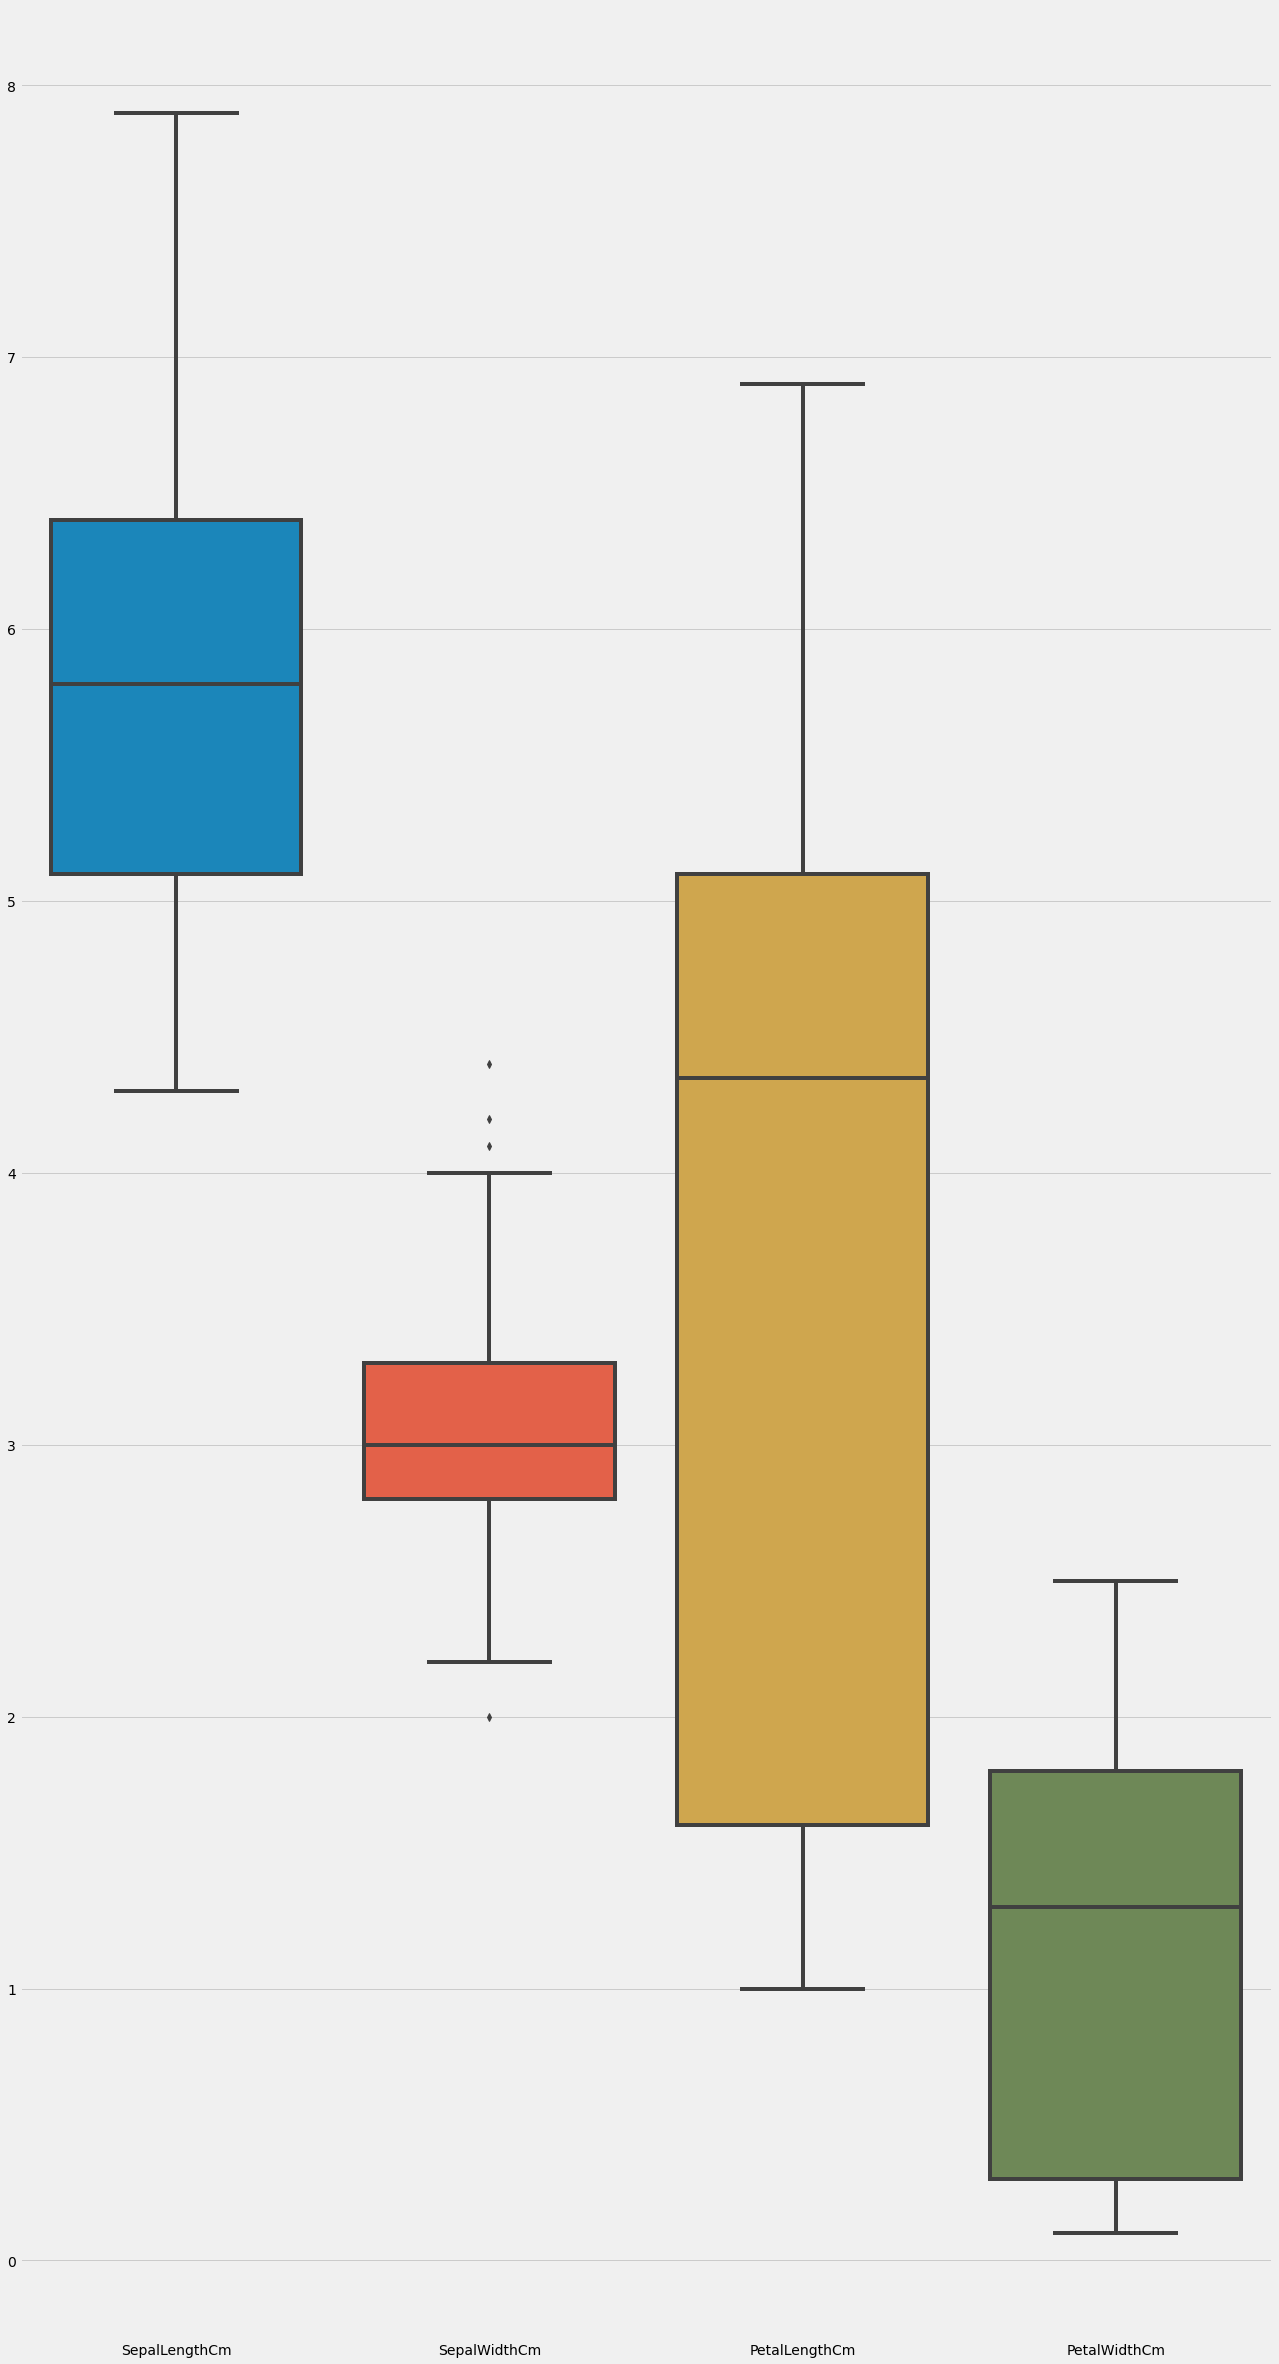

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (20,40))
sns.boxplot(data=Iris_df.iloc[:,:4])

### Inferences:-
### 1.Both PetalLength & PetalWidth are left skewed as mean is less than median.
### 2 SepalLength is normally distrubuted.
### 3.SepalWidth has outliers and is right skewed.

### Correlation among all variables and give your insights

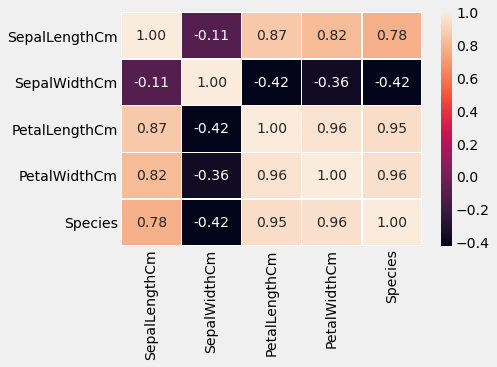

In [51]:
sns.heatmap(Iris_df.corr(), annot=True, linewidths=.4, fmt= '.2f')

### Inferences:-
### 1.PetalLength & PetalWidth are highly correlated to each other.
### 2.SepalWidth is negativley correlated with PetalLength & PetalWidth as well as target column.

### Split data in Training and Validation in 80:20

In [52]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi , test_size=0.2, random_state=3)

In [53]:
print('Number of records in Train :',Xi_train.shape[0])

Number of records in Train : 120


In [54]:
print('Number of records in Test :',Xi_test.shape[0])

Number of records in Test : 30


### Do Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xi_train_scaled = scaler.fit_transform(Xi_train) 
Xi_test_scaled = scaler.fit_transform(Xi_test)

### Train and Fit NaiveBayes Model

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
NB_model=GaussianNB()
NB_model.fit(Xi_train_scaled,yi_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [58]:
print('NaiveBayes accuracy score for training set: %f' % NB_model.score(Xi_train_scaled, yi_train))
print('NaiveBayes accuracy score for testing set: %f' % NB_model.score(Xi_test_scaled, yi_test))
from sklearn.metrics import classification_report
yi_true, yi_pred = yi_test, NB_model.predict(Xi_test_scaled)
print(classification_report(yi_true, yi_pred))

NaiveBayes accuracy score for training set: 0.950000
NaiveBayes accuracy score for testing set: 0.966667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [59]:
from sklearn import metrics
print(metrics.confusion_matrix(yi_test, yi_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


### Inferences:-As model accuracy score in test & train environment is more than 90% ,close to each other and recall & precision is greater than 90%, therefore the model built is a good model.